In [1]:
from helpers.helpers import *


/home/raif/anaconda3/envs/ml/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [43]:
df = pd.read_csv("datasets/hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [44]:
check_df(df)

------Shape------
(322, 20)
------Head------
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  
------

In [45]:
missing_values_table(df)

        n_miss  ratio
Salary      59  18.32


In [46]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
impute = KNNImputer(n_neighbors=4)
nan_impute = Pipeline([("imputer",impute)])

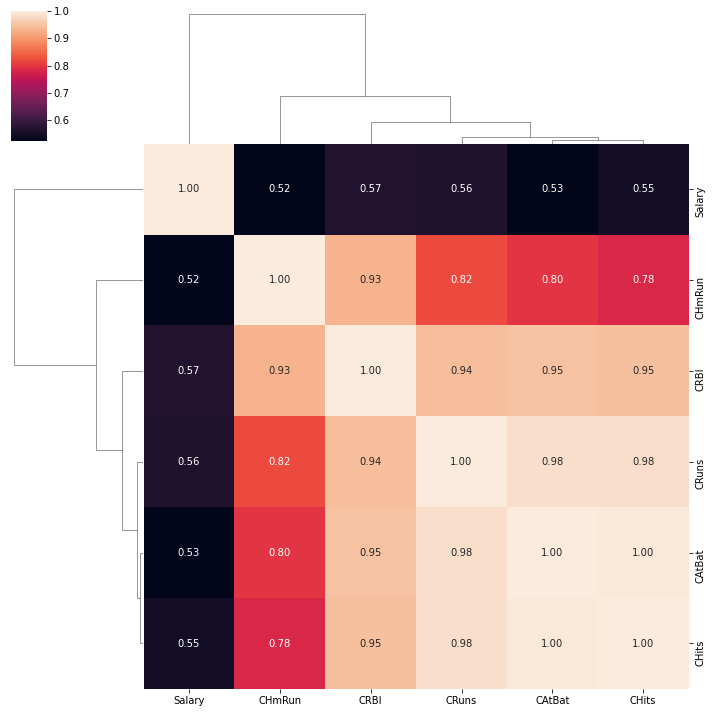

['CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'Salary']

In [47]:
target_corr(df,"Salary")

In [48]:
high_corr_cols(df,corr_th = 0.7)

['Hits',
 'Runs',
 'RBI',
 'Walks',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'Errors']

In [49]:
cat_cols,num_cols,_= grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [50]:
for col in num_cols:
    print(col,check_outlier(df,col))

AtBat False
Hits False
HmRun True
Runs True
RBI True
Walks True
Years True
CAtBat True
CHits True
CHmRun True
CRuns True
CRBI True
CWalks True
PutOuts True
Assists True
Errors True
Salary True


In [51]:
outliers = []
for col in num_cols:
    if(check_outlier(df,col,0.1,0.9)):
        outliers.append(col)

In [52]:
outliers

['CHits', 'CHmRun', 'CWalks']

In [53]:
for col in outliers:
    replace_with_thresholds(df,col)

In [54]:
for col in num_cols:
    print(col,check_outlier(df,col,0.1,0.9))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


In [55]:
df['NEW_HitRatio'] = df['Hits'] / df['AtBat']
df['NEW_RunRatio'] = df['HmRun'] / df['Runs']
df['NEW_CHitRatio'] = df['CHits'] / df['CAtBat']
df['NEW_CRunRatio'] = df['CHmRun'] / df['CRuns']

df['NEW_Avg_AtBat'] = df['CAtBat'] / df['Years']
df['NEW_Avg_Hits'] = df['CHits'] / df['Years']
df['NEW_Avg_HmRun'] = df['CHmRun'] / df['Years']
df['NEW_Avg_Runs'] = df['CRuns'] / df['Years']
df['NEW_Avg_RBI'] = df['CRBI'] / df['Years']
df['NEW_Avg_Walks'] = df['CWalks'] / df['Years']

In [56]:
df[num_cols]=nan_impute.fit_transform(df[num_cols])


In [57]:

y = df.Salary
X = df.drop("Salary",axis=1)
num_cols.remove("Salary")
y

0        88.75
1       475.00
2       480.00
3       500.00
4        91.50
        ...   
317     700.00
318     875.00
319     385.00
320     960.00
321    1000.00
Name: Salary, Length: 322, dtype: float64

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
num_pipeline = Pipeline([
    ("std_scaler",StandardScaler())
])
    
full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_cols),
    ("cat",OneHotEncoder(),cat_cols)
])
df_prepared = full_pipeline.fit_transform(X)

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
train_X,test_x,train_y,test_y = train_test_split(df_prepared,y,test_size=0.2)

In [60]:
train_X

array([[ 1.149542  ,  0.88341747,  1.17644868, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.10384013,  1.09901579, -0.5485808 , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.59459069,  0.3659815 ,  0.14143099, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-1.27265725, -1.22944607, -0.43357884, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.39219668,  0.3659815 ,  1.98146244, ...,  0.        ,
         1.        ,  0.        ],
       [-0.60671568, -0.53953145, -0.43357884, ...,  1.        ,
         0.        ,  1.        ]])

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(train_X,train_y)

RandomForestRegressor(random_state=42)

In [62]:
prediction=rf.predict(test_x)

In [63]:
a = mean_squared_error(test_y,prediction)

In [64]:
np.sqrt(a)

286.6254472690853

In [74]:
rf_params = {"max_depth": [5, 7, 10],
             "max_features": [5, 6, 8],
             "n_estimators": [2,4,6,8,10],
             "min_samples_split": [2,5,7,10]}

In [75]:
rf_cv_model = GridSearchCV(rf,rf_params,cv=10,verbose=10,n_jobs=-1).fit(train_X,train_y)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV 1/10; 1/180] START max_depth=5, max_features=5, min_samples_split=2, n_estimators=2
[CV 2/10; 1/180] START max_depth=5, max_features=5, min_samples_split=2, n_estimators=2
[CV 3/10; 1/180] START max_depth=5, max_features=5, min_samples_split=2, n_estimators=2
[CV 4/10; 1/180] START max_depth=5, max_features=5, min_samples_split=2, n_estimators=2
[CV 5/10; 1/180] START max_depth=5, max_features=5, min_samples_split=2, n_estimators=2
[CV 1/10; 1/180] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=2;, score=0.294 total time=   0.0s
[CV 2/10; 1/180] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=2;, score=0.388 total time=   0.0s
[CV 3/10; 1/180] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=2;, score=0.659 total time=   0.0s
[CV 5/10; 1/180] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=2;, score=-0.007 total time=   0.0s
[CV 4/10; 1/180] E

In [76]:
rf_cv_model.best_score_

0.6163798960346052

In [77]:
rf_cv_model.best_params_

{'max_depth': 7, 'max_features': 6, 'min_samples_split': 7, 'n_estimators': 10}

In [69]:
rf_cv_model.best_estimator_

RandomForestRegressor(max_depth=10, max_features=6, min_samples_split=10,
                      n_estimators=10, random_state=42)

In [78]:
rf_model = rf_cv_model.best_estimator_

In [79]:
predict = rf_model.predict(test_x)

In [80]:
np.sqrt(mean_squared_error(test_y,predict))

277.06468854061404